# Shop Customer - Clustering 

Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

Dataset consists of 2000 records and 8 columns:

Customer ID
Gender
Age
Annual Income
Spending Score - Score assigned by the shop, based on customer behavior and spending nature
Profession
Work Experience - in years
Family Size

[**Data by DATA SCIENTIST ANNA from Kaggle**](https://www.kaggle.com/datasets/datascientistanna/customers-dataset)

A project to find different clusters of customers

*Import the most important libraries*

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## K-Means Clustering

### using the Annual Income ($) and the Spending Score (1-100)

Importing the Dataset

In [30]:
dataset = pd.read_csv('Customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [31]:
X = dataset.iloc[:, [3, 4]].values
X

array([[ 15000,     39],
       [ 35000,     81],
       [ 86000,      6],
       ...,
       [ 90961,     14],
       [182109,      4],
       [110610,     52]])

Finding the optimal number of clusters with the **Elbow Method**

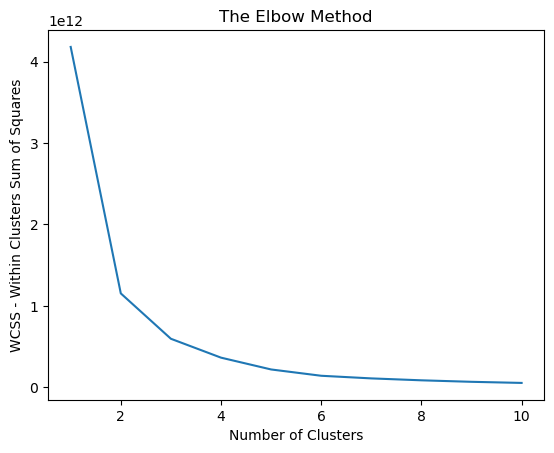

In [32]:
from sklearn.cluster import KMeans
# calculate the the within cluster sum of squares
wcss = []
for i in range(1, 11):
    # improve the clustering using the K-Means++ Method
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot the Within Cluster Sum of Squares 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS - Within Clusters Sum of Squares')
plt.show()

The 'elbow' where the rapid falling curve drastically decrease its falling seem to be at **3 clusters**.

Training the K-Means Model on the Dataset:

In [33]:
kmeans = KMeans(n_clusters=3, init='k-means++')
prediction = kmeans.fit_predict(X)

Visualizing the clusters: 

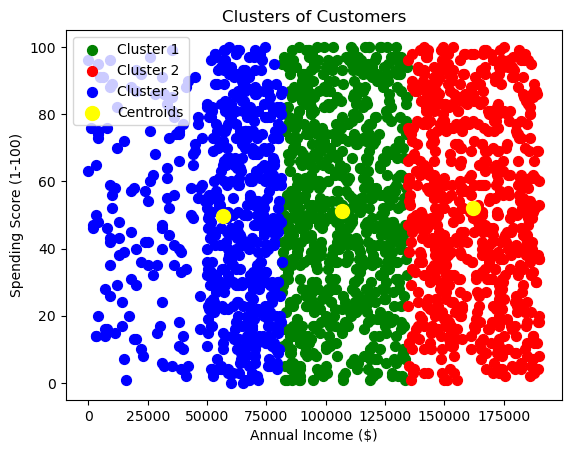

In [34]:
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s=50, c = 'green', label='Cluster 1')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1], s=50, c='blue', label='Cluster 3')

# plot the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

All the data points seem relatively evenly spread across the different Spending Scores and Annual Incomes. Therefore the clusters only differ by different income classes.
- Cluster 1: ca. 0 - 85.000 $
- Cluster 2: ca. 85.000 - 135.000 $
- Cluster 3: ca. 135.000 $ - 

**Maybe there is a more interesting clustering when using the Age and the Spending Score:**

In [44]:
X = dataset.iloc[:, [2, 4]].values

Using the Elbow Method to find the optimal number of cluster again:

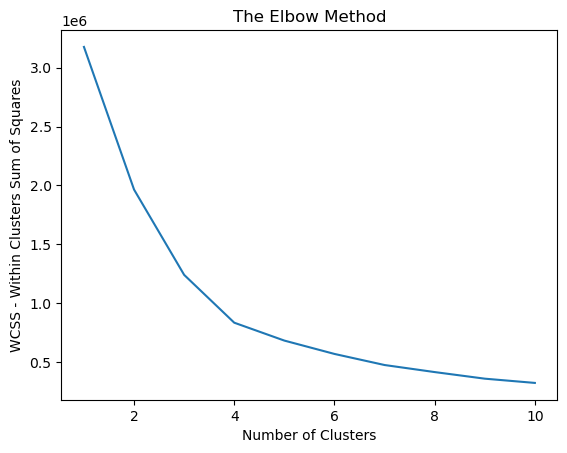

In [45]:
from sklearn.cluster import KMeans
# calculate the the within cluster sum of squares
wcss = []
for i in range(1, 11):
    # improve the clustering using the K-Means++ Method
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot the Within Cluster Sum of Squares 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS - Within Clusters Sum of Squares')
plt.show()

Here the 'elbow' seems to be at 4 clusters.

In [47]:
# predicting the cluster
kmeans = KMeans(n_clusters=4, init='k-means++')
prediction = kmeans.fit_predict(X)

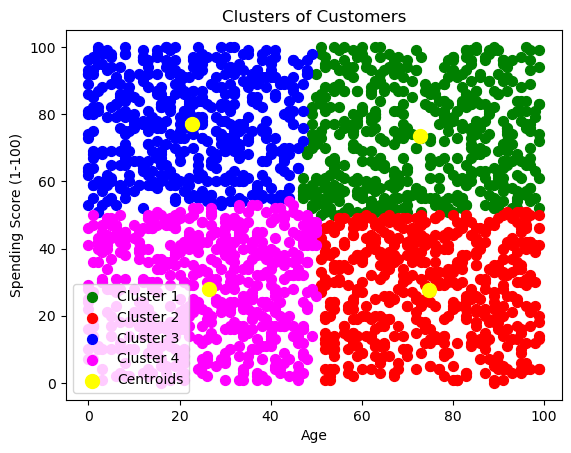

In [48]:


# visualization of the clustering
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s=50, c = 'green', label='Cluster 1')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[prediction == 3, 0], X[prediction == 3, 1], s=50, c='magenta', label='Cluster 4')

# plot the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

This seem similar evenly distributed across all ages and Spending Scores.

### Hierarchical Clustering